# Stock Prediction with LSTM 
By Vety Bhakti Lestari

## Business Understanding


### Problem Statement
Professionals in the fields of data analysis and data science encounter challenges in effectively managing time series data, which consists of a sequence of data points organized sequentially. Despite its widespread prevalence, there is a need for acquiring expertise in handling such data, especially concerning its application in financial markets.

### Goals

1. To understand the significance and prevalence of time series data in the context of data analysis and data science.
2. To explore and analyze time series data sourced from the stock market, focusing on prominent technology companies including Apple, Amazon, Google, and Microsoft.
3. To utilize the yfinance library to gather stock data efficiently.
4. To employ data visualization techniques using Seaborn and Matplotlib to comprehend various aspects of the stock market data.
5. To investigate methodologies for assessing stock risk based on historical performance.
6. To develop a predictive model using a Long Short Term Memory (LSTM) approach to forecast future stock prices.

### Objectives

1. To gain proficiency in managing and manipulating time series data.
2. To collect stock market data using the yfinance library.
3. To visualize stock market data using Seaborn and Matplotlib, facilitating better understanding and analysis.
4. To explore different techniques for assessing stock risk based on historical performance indicators.
5. To implement an LSTM model for predicting future stock prices based on past data.
6. To evaluate the effectiveness of the predictive model and its potential applications in financial analysis and decision-making.

## Data Understanding

### Acquiring the Data
Our initial task involves obtaining and loading the data into memory. We will retrieve our stock data from the Yahoo Finance platform, renowned for its vast array of financial market data and tools aiding in the discovery of promising investments. To access the data from Yahoo Finance, we will utilize the yfinance library, which provides an efficient and Pythonic approach for downloading market data from Yahoo. Refer to this resource for further insights into yfinance: [Effortlessly download historical market data using Python](https://aroussi.com/post/python-yahoo-finance).

### Data Definition

- **Open:** The opening price of the stock during a particular trading period.
- **High:** The highest price reached by the stock during the same trading period.
- **Low:** The lowest price reached by the stock during the same trading period.
- **Close:** The closing price of the stock at the end of the trading period.
- **Adj Close:** The adjusted closing price of the stock, which accounts for any corporate actions such as dividends, stock splits, etc.
- **Volume:** The total number of shares traded during the trading period.
- **Company Name:** The name of the company corresponding to the stock data.

# Data Preparation

### Data Retrieval

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline

# For reading stock data from yahoo
from pandas_datareader.data import DataReader
import yfinance as yf
from pandas_datareader import data as pdr

yf.pdr_override()

# For time stamps
from datetime import datetime


# The tech stocks we'll use for this analysis
tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN']

# Set up End and Start times for data grab
tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN']

end = datetime.now()
start = datetime(end.year - 1, end.month, end.day)

for stock in tech_list:
    globals()[stock] = yf.download(stock, start, end)
    

company_list = [AAPL, GOOG, MSFT, AMZN]
company_name = ["APPLE", "GOOGLE", "MICROSOFT", "AMAZON"]

for company, com_name in zip(company_list, company_name):
    company["company_name"] = com_name
    
df = pd.concat(company_list, axis=0)
df.tail(10)

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume,company_name
Date,,,,,,,
2024-04-22,176.940002,178.869995,174.559998,177.229996,177.229996,37924900,AMAZON
2024-04-23,178.080002,179.929993,175.979996,179.539993,179.539993,37046500,AMAZON
2024-04-24,179.940002,180.320007,176.179993,176.589996,176.589996,34185100,AMAZON
2024-04-25,169.679993,173.919998,166.320007,173.669998,173.669998,49249400,AMAZON
2024-04-26,177.800003,180.820007,176.130005,179.619995,179.619995,43919800,AMAZON
2024-04-29,182.750000,183.529999,179.389999,180.960007,180.960007,54063900,AMAZON
2024-04-30,181.089996,182.990005,174.800003,175.000000,175.000000,94639800,AMAZON
2024-05-01,181.639999,185.149994,176.559998,179.000000,179.000000,94645100,AMAZON
2024-05-02,180.850006,185.100006,179.910004,184.720001,184.720001,54303500,AMAZON


Upon examining our data, it becomes evident that it consists of numerical values with dates serving as the index. Additionally, it's observable that weekends are absent from the records.

### Exploratory Data Analysis

#### Summary Statistics of the Data
.describe() produces summary statistics, encompassing measures that summarize the center, spread, and distribution shape of a dataset, while excluding NaN values.

It examines both numerical and categorical series, as well as sets of DataFrame columns with mixed data types. The output will vary depending on the input provided. For further clarification, please refer to the notes below.

In [2]:
# Summary Stats
AAPL.describe()

,Open,High,Low,Close,Adj Close,Volume
count,252.000000,252.000000,252.000000,252.000000,252.000000,2.520000e+02
mean,181.236865,182.708095,179.867460,181.334484,180.958923,5.844080e+07
std,8.671867,8.507948,8.631171,8.604356,8.550422,1.885213e+07
min,164.889999,166.399994,164.080002,165.000000,164.909760,2.404830e+07
25%,173.359997,175.174999,172.095001,173.705002,173.307564,4.678918e+07
50%,180.769997,182.284996,178.760002,180.730003,180.240234,5.371445e+07
75%,189.277496,189.990005,187.652500,189.317501,188.879906,6.485765e+07
max,198.020004,199.619995,197.000000,198.110001,197.857529,1.577418e+08


We have only 252 records in one year because weekends are not included in the data.

#### Data Details
The .info() function displays details regarding a DataFrame, including the data types of the index and columns, the count of non-null values, and the memory usage.

In [4]:
# Detail info
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 252 entries, 2023-05-04 to 2024-05-03
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          252 non-null    float64
 1   High          252 non-null    float64
 2   Low           252 non-null    float64
 3   Close         252 non-null    float64
 4   Adj Close     252 non-null    float64
 5   Volume        252 non-null    int64  
 6   company_name  252 non-null    object 
dtypes: float64(5), int64(1), object(1)
memory usage: 15.8+ KB


#### Closing Price

The closing price denotes the last price at which a stock is exchanged during the typical trading session. Investors commonly rely on a stock's closing price as a standard measure to monitor its performance across time.

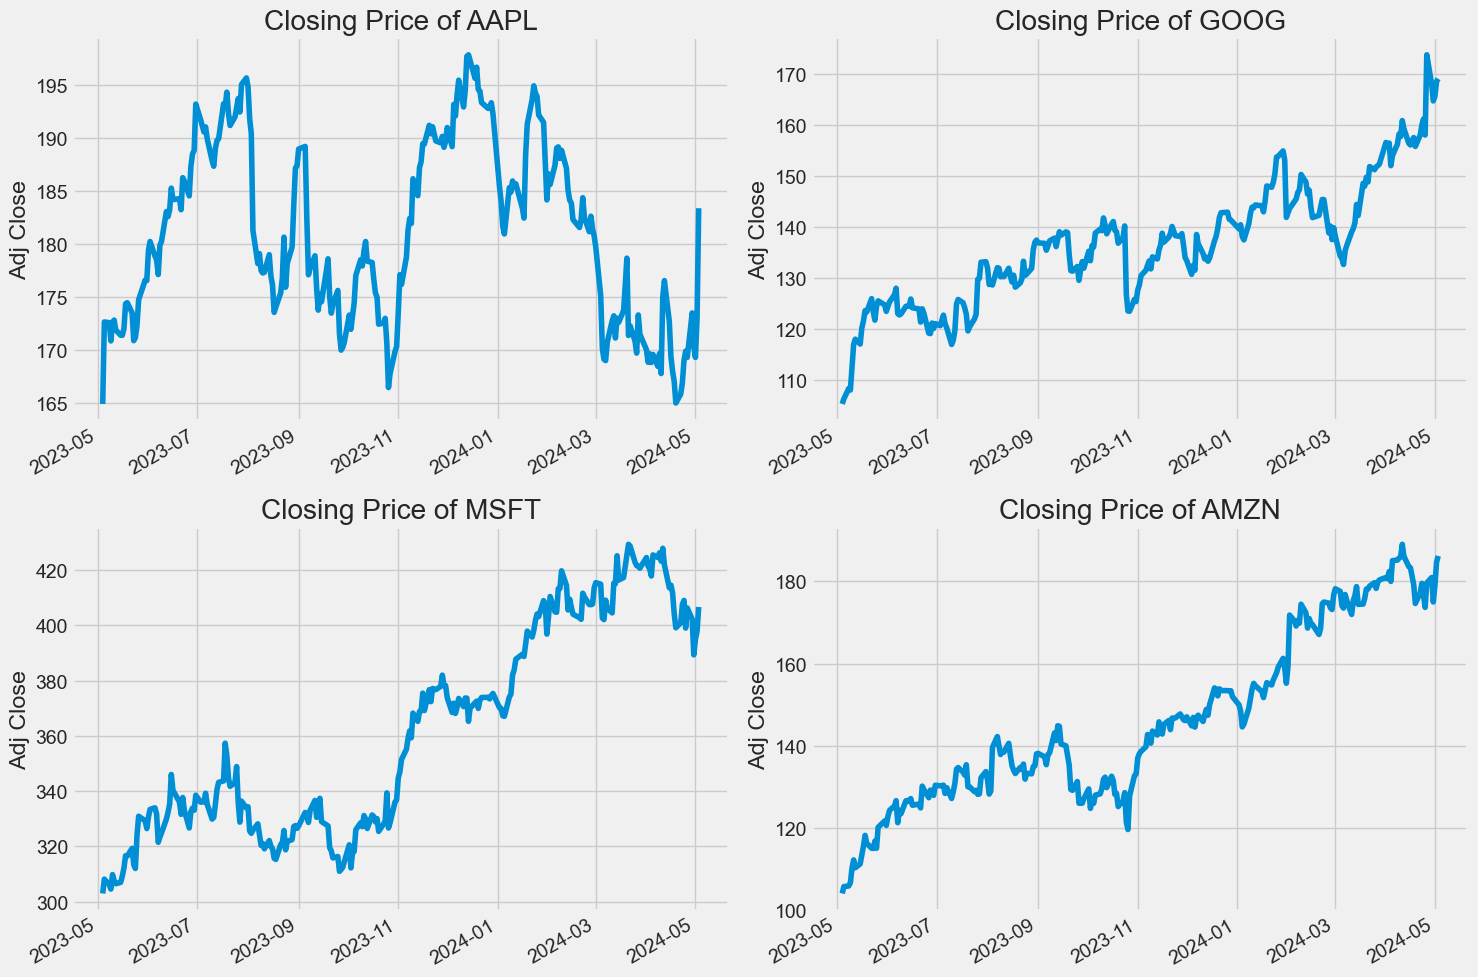

In [5]:
# Let's see a historical view of the closing price
plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Adj Close'].plot()
    plt.ylabel('Adj Close')
    plt.xlabel(None)
    plt.title(f"Closing Price of {tech_list[i - 1]}")
    
plt.tight_layout()

#### Volume of Sales

Volume represents the quantity of an asset or security that is exchanged within a specific timeframe, typically spanning a day. For example, in stock trading, volume indicates the number of shares traded between the opening and closing of the market. Analyzing trading volume and its fluctuations over time are crucial factors for technical traders.

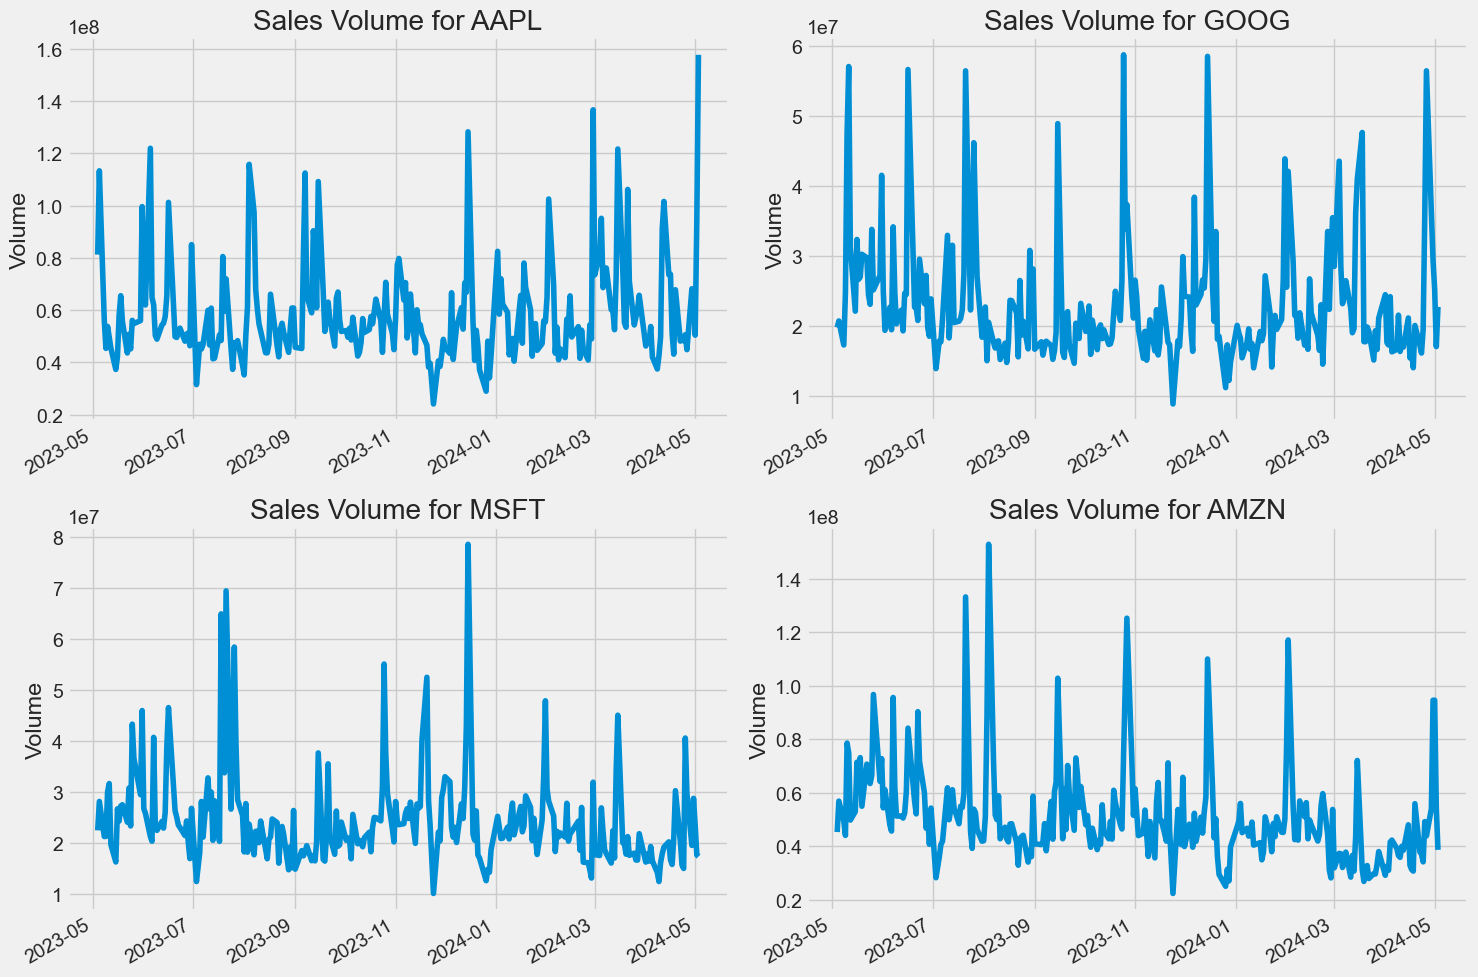

In [6]:
# Now let's plot the total volume of stock being traded each day
plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Volume'].plot()
    plt.ylabel('Volume')
    plt.xlabel(None)
    plt.title(f"Sales Volume for {tech_list[i - 1]}")
    
plt.tight_layout()

After examining the visual representations of the daily closing price and trading volume, let's proceed to compute the moving average for the stock.

#### Moving Average

What were the moving averages of the different stocks?

The moving average (MA) serves as a straightforward technical analysis instrument that evens out price fluctuations by continuously calculating an average price. This average is computed over a designated time frame, such as 10 days, 20 minutes, 30 weeks, or any period chosen by the trader.

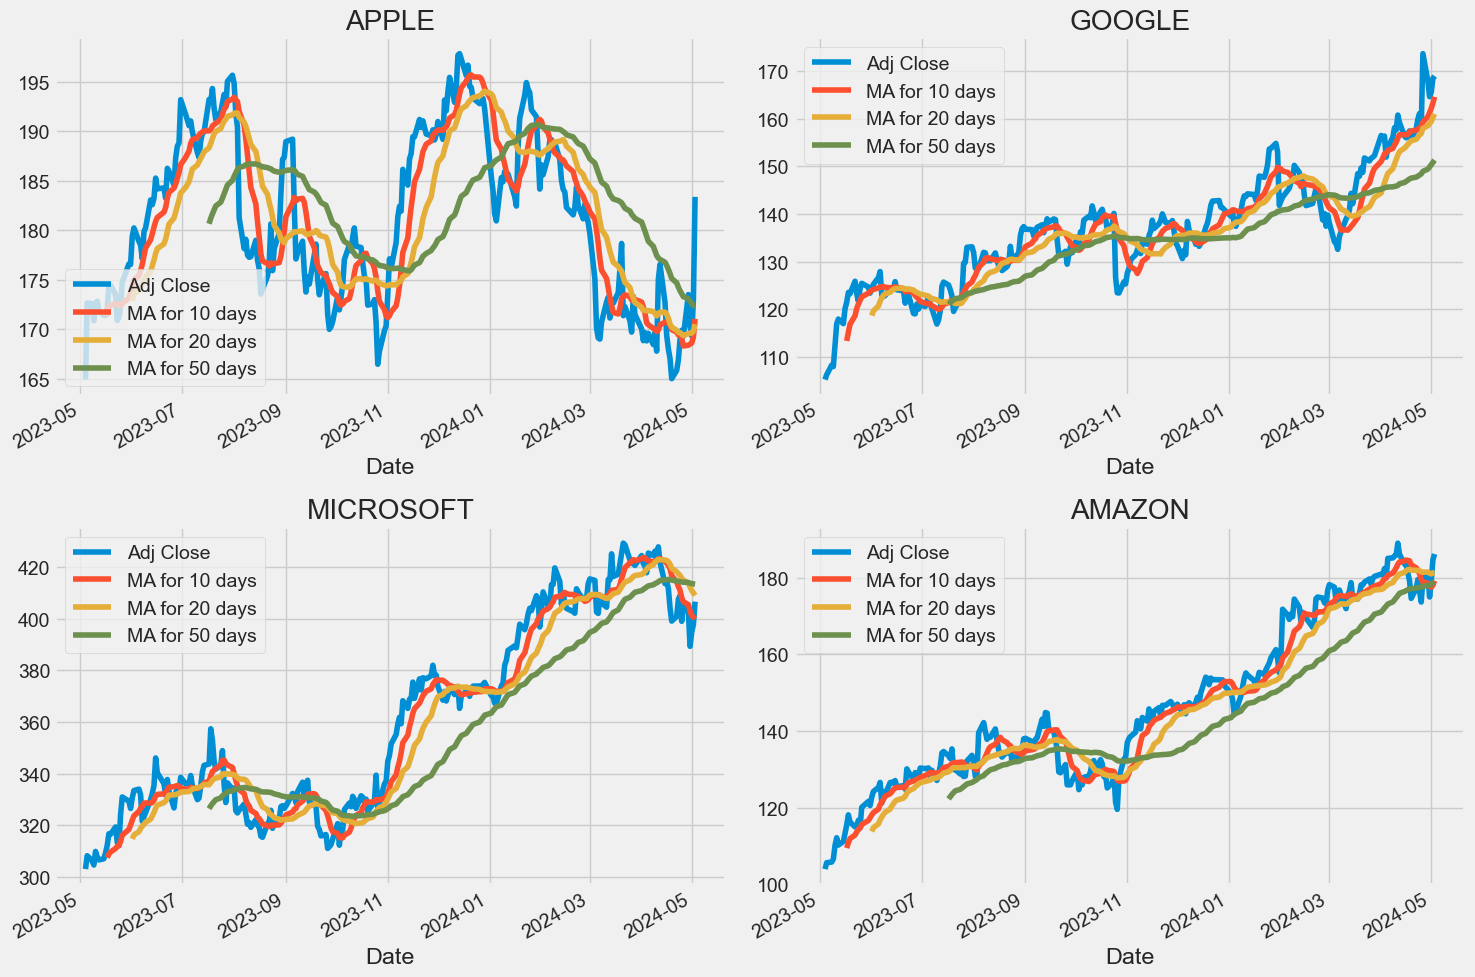

In [7]:
ma_day = [10, 20, 50]

for ma in ma_day:
    for company in company_list:
        column_name = f"MA for {ma} days"
        company[column_name] = company['Adj Close'].rolling(ma).mean()
        

fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(10)
fig.set_figwidth(15)

AAPL[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,0])
axes[0,0].set_title('APPLE')

GOOG[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,1])
axes[0,1].set_title('GOOGLE')

MSFT[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,0])
axes[1,0].set_title('MICROSOFT')

AMZN[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,1])
axes[1,1].set_title('AMAZON')

fig.tight_layout()

In the graph, it's evident that the optimal values for calculating the moving average are 10 and 20 days, as they effectively capture underlying trends in the data while minimizing noise.

#### Average Daily Return of The Stock

What was the average daily return of the stock?

Now that we've conducted initial analysis, let's delve deeper into assessing the stock's risk. To achieve this, we need to closely examine the daily fluctuations of the stock, rather than focusing solely on its absolute value. Let's proceed by utilizing pandas to fetch the daily returns for Apple stock.

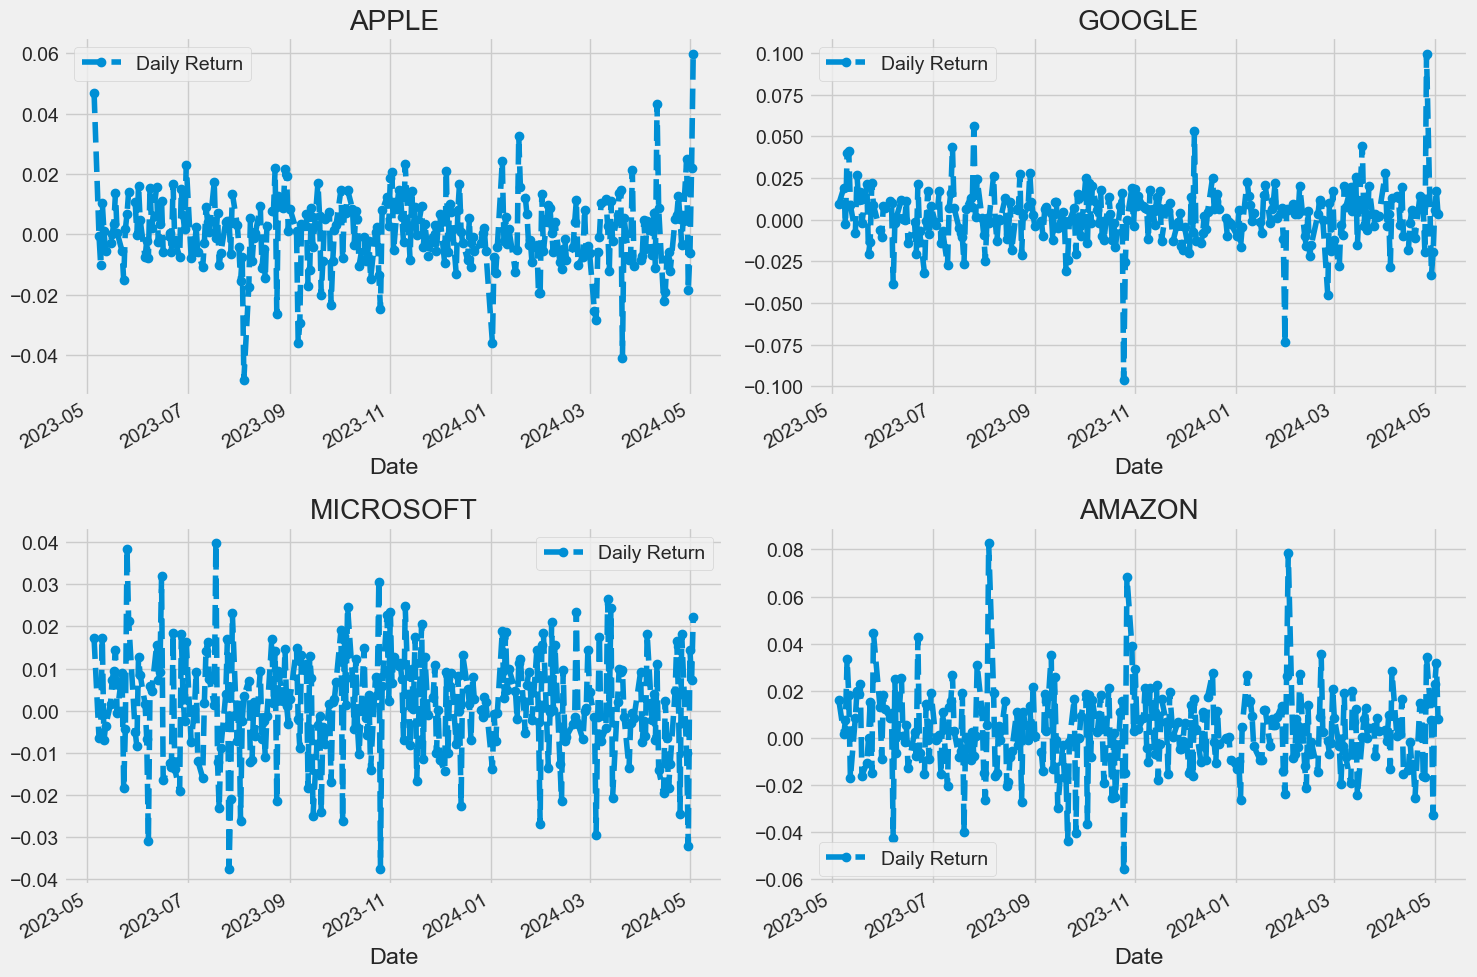

In [8]:
# We'll use pct_change to find the percent change for each day
for company in company_list:
    company['Daily Return'] = company['Adj Close'].pct_change()

# Then we'll plot the daily return percentage
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(10)
fig.set_figwidth(15)

AAPL['Daily Return'].plot(ax=axes[0,0], legend=True, linestyle='--', marker='o')
axes[0,0].set_title('APPLE')

GOOG['Daily Return'].plot(ax=axes[0,1], legend=True, linestyle='--', marker='o')
axes[0,1].set_title('GOOGLE')

MSFT['Daily Return'].plot(ax=axes[1,0], legend=True, linestyle='--', marker='o')
axes[1,0].set_title('MICROSOFT')

AMZN['Daily Return'].plot(ax=axes[1,1], legend=True, linestyle='--', marker='o')
axes[1,1].set_title('AMAZON')

fig.tight_layout()

Excellent, now let's obtain a comprehensive overview of the average daily return through a histogram. We'll employ Seaborn to generate both a histogram and a kernel density estimate (KDE) plot on the same graph.

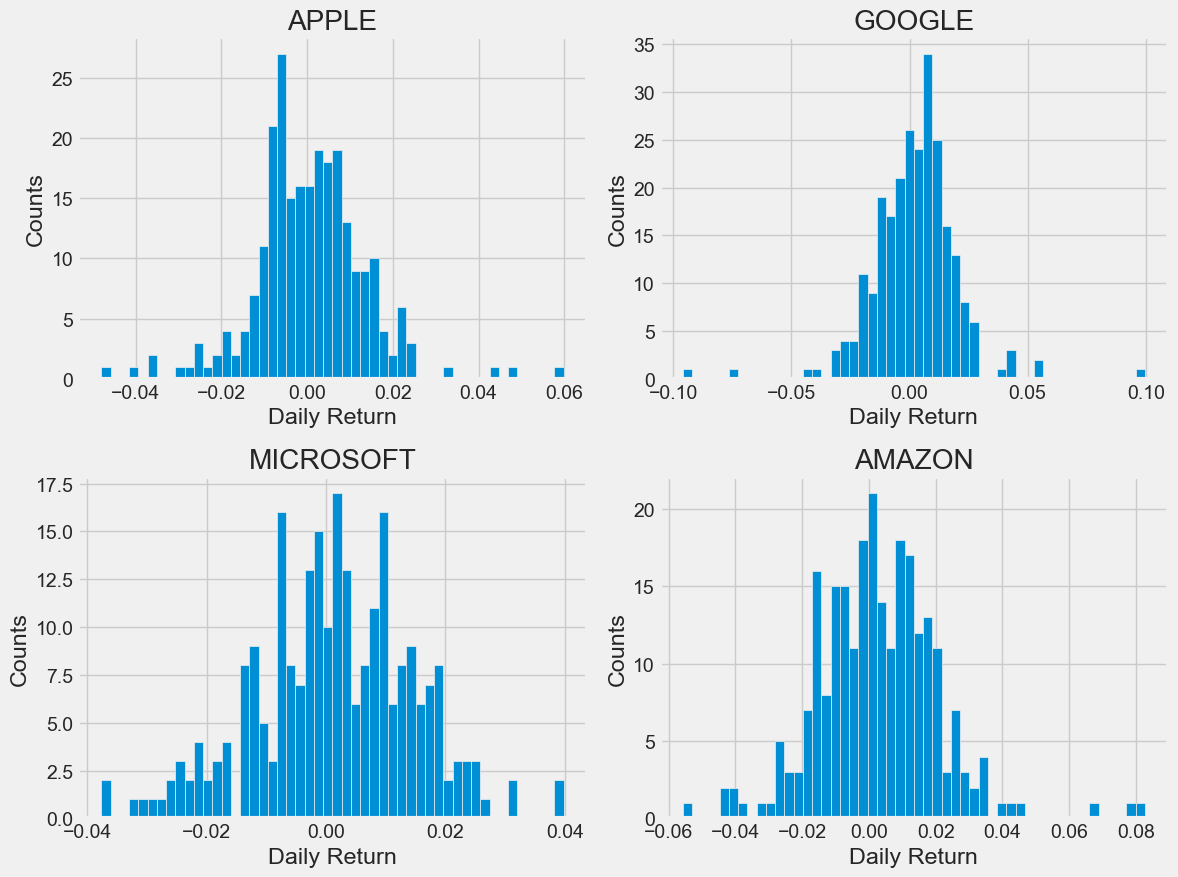

In [9]:
plt.figure(figsize=(12, 9))

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Daily Return'].hist(bins=50)
    plt.xlabel('Daily Return')
    plt.ylabel('Counts')
    plt.title(f'{company_name[i - 1]}')
    
plt.tight_layout()

#### Correlation Between Different Stocks and Closing Prices

Correlation is a metric indicating the extent to which two variables are related, with a value ranging from -1.0 to +1.0. While correlation quantifies association, it does not reveal causation between variables or whether a third factor is influencing the relationship.

Now, if we aim to examine the returns of all stocks in our list, let's proceed by constructing a DataFrame containing the 'Close' columns from each of the stock dataframes.

In [10]:
# Grab all the closing prices for the tech stock list into one DataFrame
closing_df = pdr.get_data_yahoo(tech_list, start=start, end=end)['Adj Close']

# Make a new tech returns DataFrame
tech_rets = closing_df.pct_change()
tech_rets.head()

[*********************100%%**********************]  4 of 4 completed


Ticker,AAPL,AMZN,GOOG,MSFT
Date,,,,
2023-05-04,NaN,NaN,NaN,NaN
2023-05-05,0.046927,0.015962,0.009552,0.017157
2023-05-08,-0.000403,0.001609,0.019065,-0.006438
2023-05-09,-0.009971,0.007465,-0.002772,-0.005346
2023-05-10,0.010421,0.033483,0.040207,0.017296


Now we can compare the daily percentage return of two stocks to check how correlated. First let's see a sotck compared to itself.

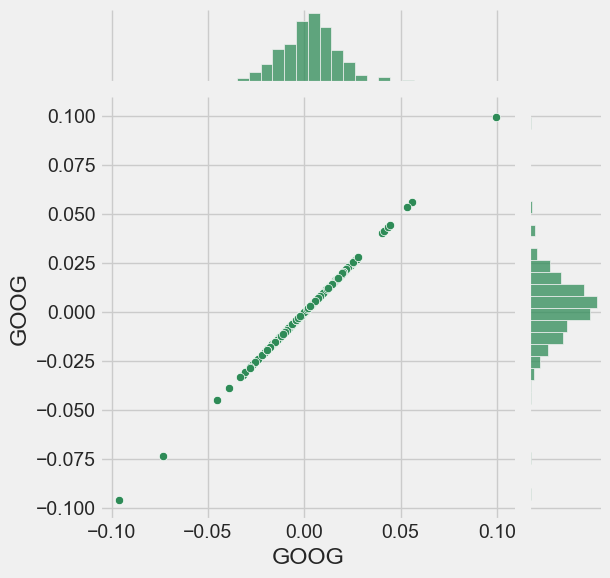

In [11]:
# Comparing Google to itself should show a perfectly linear relationship
sns.jointplot(x='GOOG', y='GOOG', data=tech_rets, kind='scatter', color='seagreen')

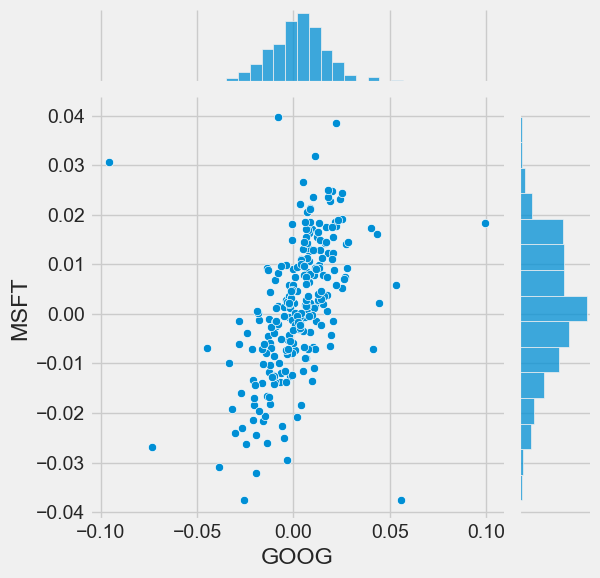

In [12]:
# We'll use joinplot to compare the daily returns of Google and Microsoft
sns.jointplot(x='GOOG', y='MSFT', data=tech_rets, kind='scatter')

Now, with this observation, it becomes apparent that if two stocks exhibit perfect positive correlation, a linear relationship should manifest between their daily return values.

Seaborn and pandas simplify the process of conducting this comparative analysis for all conceivable combinations of stocks in our technology stock ticker list. Utilizing sns.pairplot(), we can effortlessly generate this plot automatically.

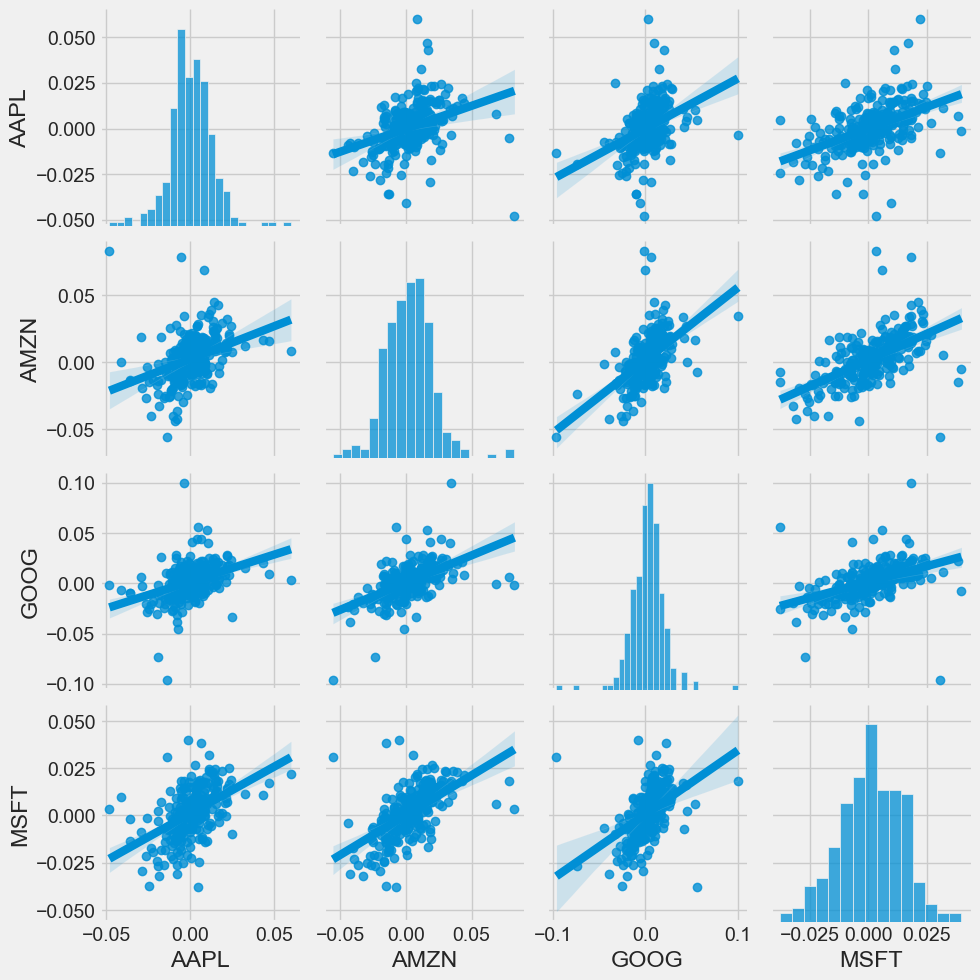

In [13]:
# We can simply call pairplot on our DataFrame for an automatic visual analysis 
# of all the comparisons

sns.pairplot(tech_rets, kind='reg')

Above, we observe the relationships in daily returns among all the stocks. A brief observation reveals an intriguing correlation between the daily returns of Google and Amazon. It could be worthwhile to delve deeper into this specific comparison.

Although the convenience of utilizing sns.pairplot() is remarkable, we can also leverage sns.PairGrid() to have complete control over the figure, including the type of plots displayed in the diagonal, upper triangle, and lower triangle. Below is an example demonstrating the comprehensive capabilities of seaborn to accomplish this objective.

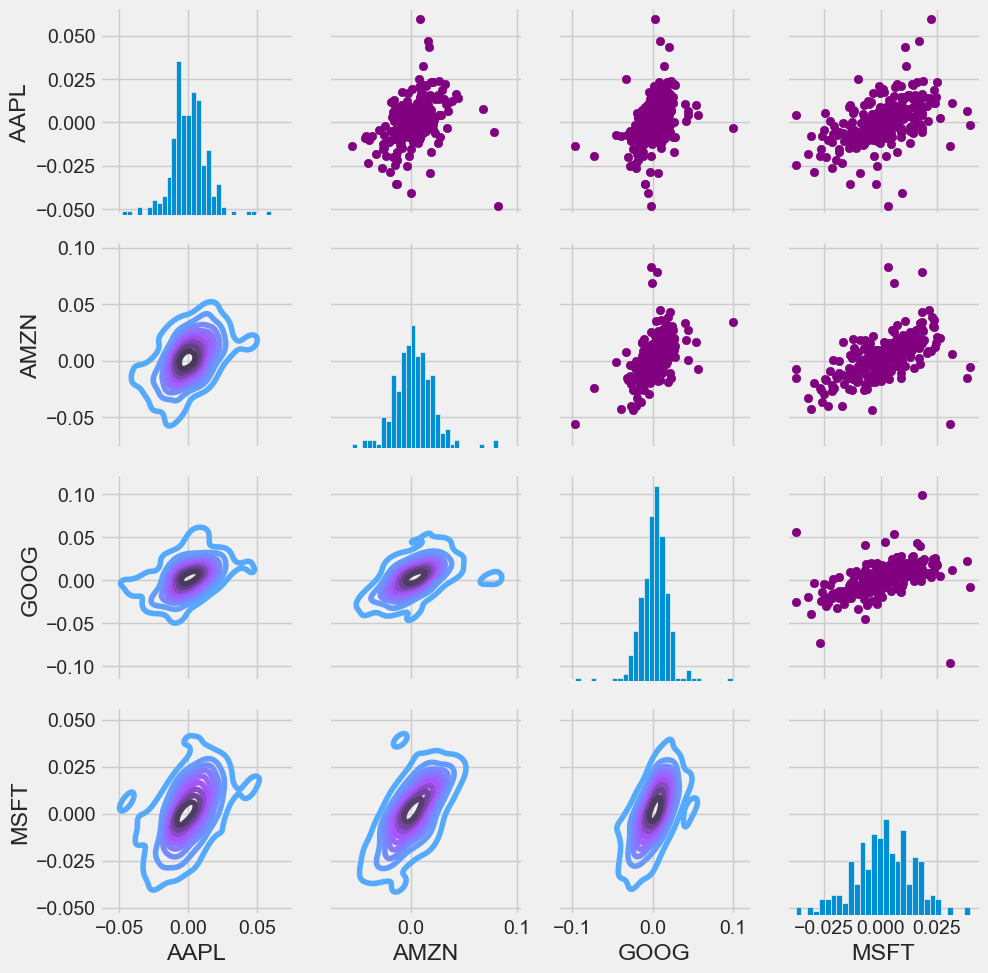

In [14]:
# Set up our figure by naming it returns_fig, call PairPLot on the DataFrame
return_fig = sns.PairGrid(tech_rets.dropna())

# Using map_upper we can specify what the upper triangle will look like.
return_fig.map_upper(plt.scatter, color='purple')

# We can also define the lower triangle in the figure, inclufing the plot type (kde) 
# or the color map (BluePurple)
return_fig.map_lower(sns.kdeplot, cmap='cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the daily return
return_fig.map_diag(plt.hist, bins=30)

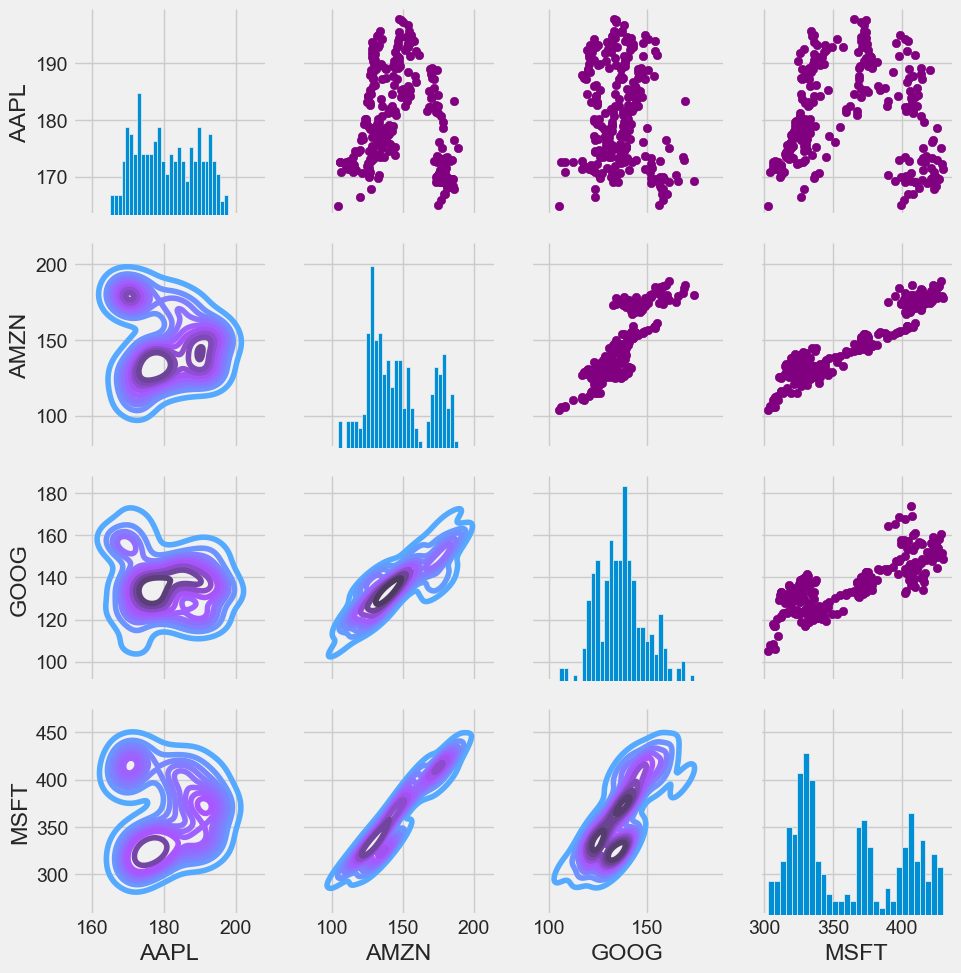

In [15]:
# Set up our figure by naming it returns_fig, call PairPLot on the DataFrame
returns_fig = sns.PairGrid(closing_df)

# Using map_upper we can specify what the upper triangle will look like.
returns_fig.map_upper(plt.scatter,color='purple')

# We can also define the lower triangle in the figure, inclufing the plot type (kde) or the color map (BluePurple)
returns_fig.map_lower(sns.kdeplot,cmap='cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the daily return
returns_fig.map_diag(plt.hist,bins=30)

Furthermore, we can generate a correlation plot to obtain numerical values indicating the correlation between the daily return values of the stocks. Upon analyzing the closing prices, an intriguing relationship between Microsoft and Apple becomes evident.

Text(0.5, 1.0, 'Correlation of stock closing price')

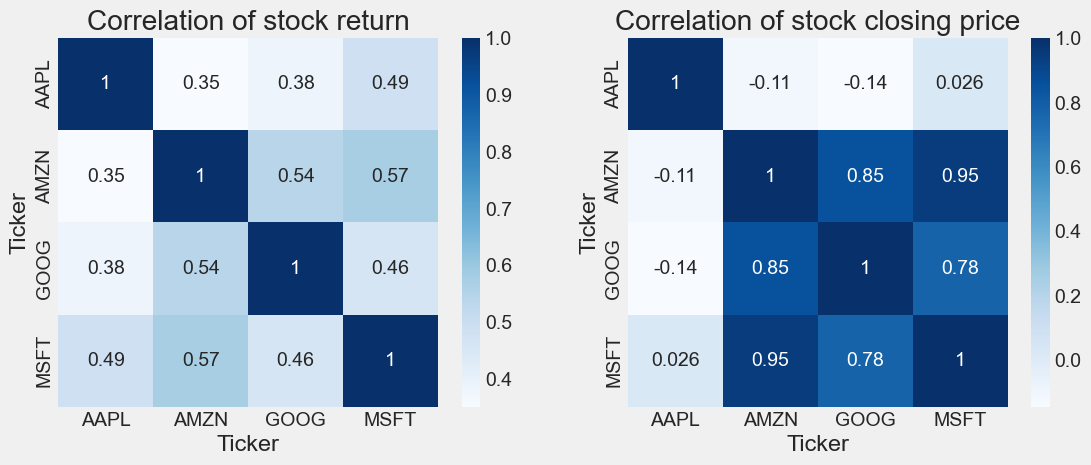

In [16]:
plt.figure(figsize=(12, 10))

plt.subplot(2, 2, 1)
sns.heatmap(tech_rets.corr(), annot=True, cmap='Blues')
plt.title('Correlation of stock return')

plt.subplot(2, 2, 2)
sns.heatmap(closing_df.corr(), annot=True, cmap='Blues')
plt.title('Correlation of stock closing price')

As anticipated from our PairPlot analysis, we observe both numerically and visually that Microsoft and Amazon exhibit the highest correlation in daily stock returns. It's noteworthy to observe that all technology companies show a positive correlation.

#### The Level of Risk Associated with Investing in a Specific Stock

There are various methods to measure risk, and one of the fundamental approaches, utilizing the data collected on daily percentage returns, involves comparing the expected return with the standard deviation of the daily returns.

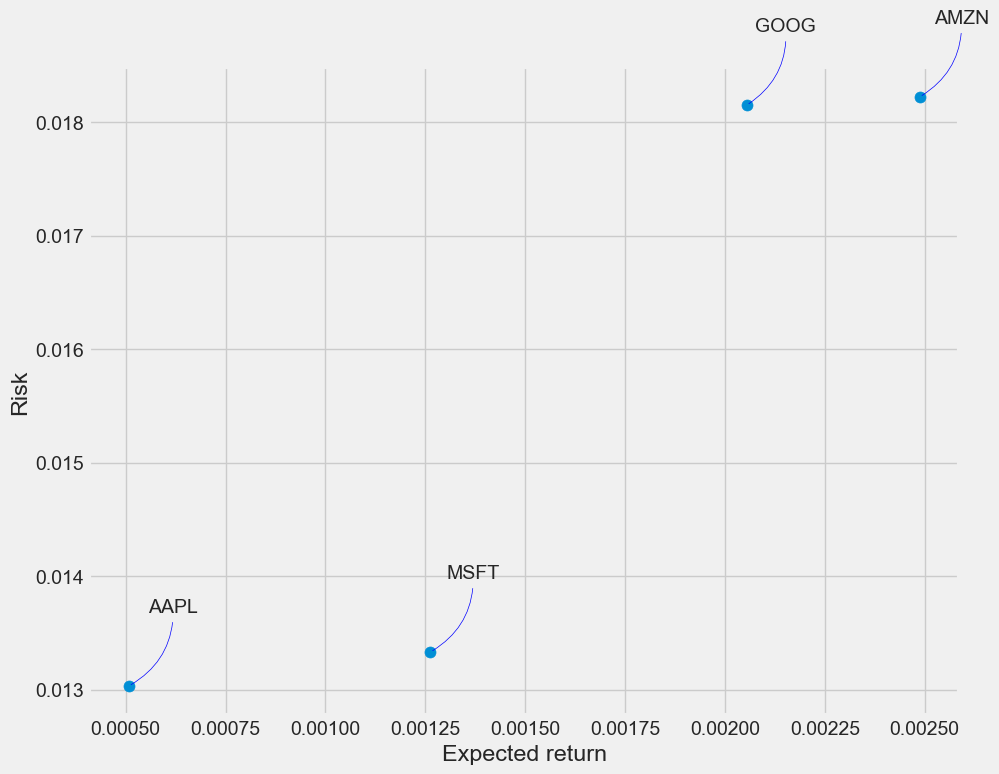

In [17]:
rets = tech_rets.dropna()

area = np.pi * 20

plt.figure(figsize=(10, 8))
plt.scatter(rets.mean(), rets.std(), s=area)
plt.xlabel('Expected return')
plt.ylabel('Risk')

for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(label, xy=(x, y), xytext=(50, 50), textcoords='offset points', ha='right', va='bottom', 
                 arrowprops=dict(arrowstyle='-', color='blue', connectionstyle='arc3,rad=-0.3'))

## Modeling

### Predicting The Closing Price Stock Price of APPLE inc

In [18]:
# Get the stock quote
df = pdr.get_data_yahoo('AAPL', start='2012-01-01', end=datetime.now())
# Show teh data
df

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-03,14.621429,14.732143,14.607143,14.686786,12.433826,302220800
2012-01-04,14.642857,14.810000,14.617143,14.765714,12.500645,260022000
2012-01-05,14.819643,14.948214,14.738214,14.929643,12.639426,271269600
2012-01-06,14.991786,15.098214,14.972143,15.085714,12.771560,318292800
2012-01-09,15.196429,15.276786,15.048214,15.061786,12.751300,394024400
...,...,...,...,...,...,...
2024-04-29,173.369995,176.029999,173.100006,173.500000,173.500000,68169400
2024-04-30,173.330002,174.990005,170.000000,170.330002,170.330002,65934800
2024-05-01,169.580002,172.710007,169.110001,169.300003,169.300003,50383100


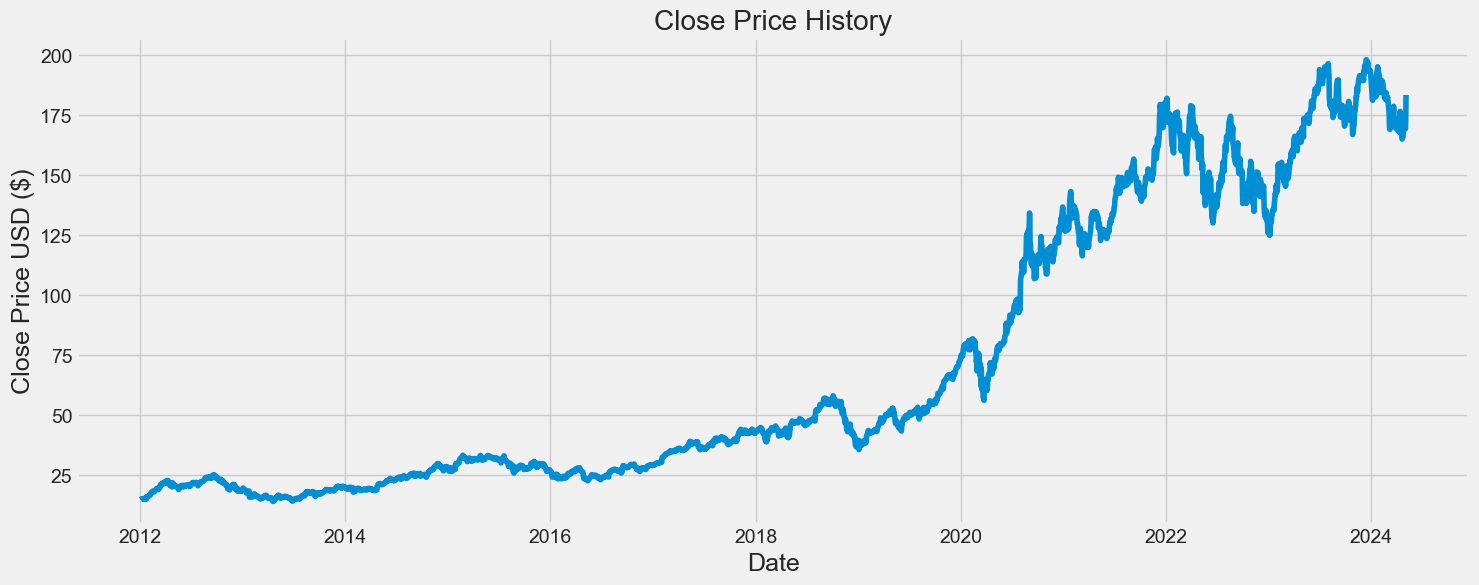

In [19]:
plt.figure(figsize=(16,6))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [20]:
# Create a new dataframe with only the 'Close column 
data = df.filter(['Close'])
# Convert the dataframe to a numpy array
dataset = data.values
# Get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset) * .95 ))

training_data_len

2949

In [21]:
# Scale the data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.00401431],
       [0.00444289],
       [0.00533302],
       ...,
       [0.84356209],
       [0.86381591],
       [0.92001631]])

In [22]:
# Create the training data set 
# Create the scaled training data set
train_data = scaled_data[0:int(training_data_len), :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()
        
# Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
# x_train.shape

[array([0.00401431, 0.00444289, 0.00533302, 0.00618049, 0.00605056,
       0.00634339, 0.00620958, 0.00598462, 0.00567821, 0.00662652,
       0.00748175, 0.007218  , 0.00577323, 0.00715207, 0.00579457,
       0.01088518, 0.01049151, 0.01100542, 0.01211663, 0.01278955,
       0.01273332, 0.01252582, 0.01341013, 0.01424207, 0.01518457,
       0.01670691, 0.01990478, 0.01995326, 0.02173353, 0.02306387,
       0.02077746, 0.02165789, 0.02164044, 0.02410915, 0.02375813,
       0.02440779, 0.02557523, 0.0262249 , 0.02809631, 0.02945961,
       0.02985329, 0.02999098, 0.02765997, 0.02709757, 0.02718096,
       0.02937236, 0.02998905, 0.03131358, 0.03443581, 0.03860139,
       0.0378218 , 0.03782373, 0.04083544, 0.04177794, 0.04110694,
       0.04049413, 0.03985611, 0.04197573, 0.0434302 , 0.04403914])]
[0.042534249860459186]

[array([0.00401431, 0.00444289, 0.00533302, 0.00618049, 0.00605056,
       0.00634339, 0.00620958, 0.00598462, 0.00567821, 0.00662652,
       0.00748175, 0.007218  , 0.0

In [23]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2889/2889 ━━━━━━━━━━━━━━━━━━━━ 54s 18ms/step - loss: 0.0035


In [24]:
# Create the testing data set
# Create a new array containing scaled values from index 1543 to 2002 
test_data = scaled_data[training_data_len - 60: , :]
# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    
# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


7.421615021709154

/var/folders/38/5jgbgc1j0n56r5w8thyk5s8h0000gn/T/ipykernel_36245/2388977846.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


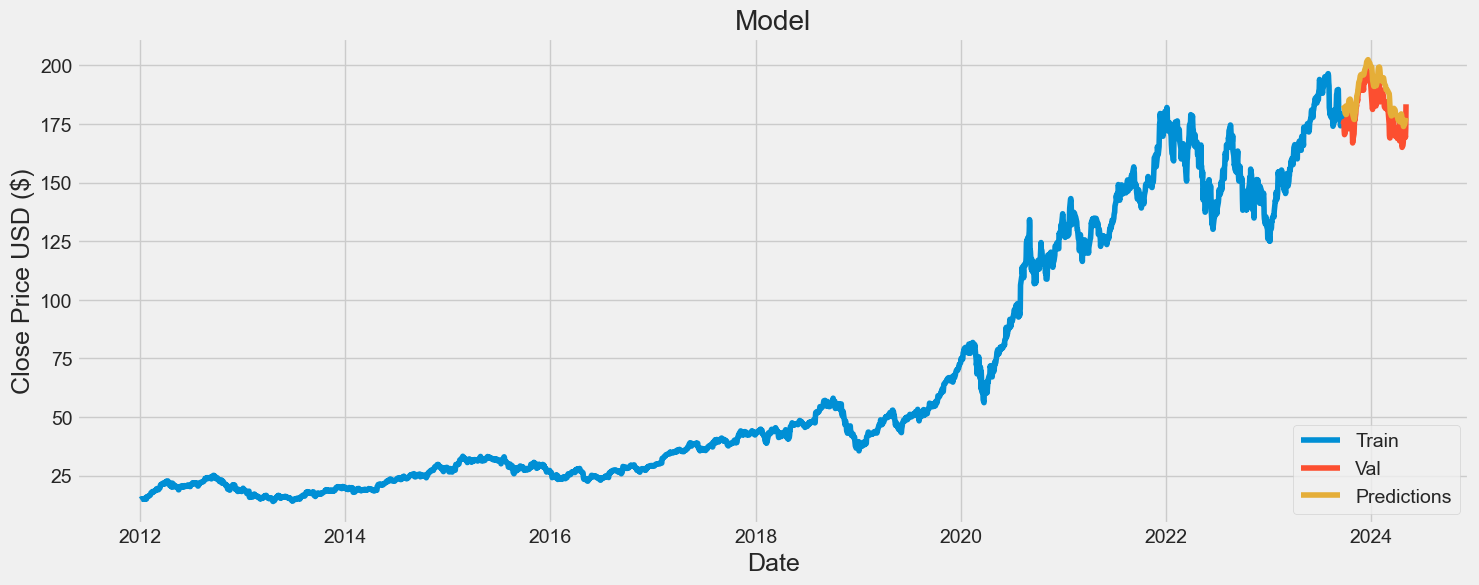

In [25]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [26]:
# Show the valid and predicted prices
valid

,Close,Predictions
Date,,
2023-09-22,174.789993,183.136169
2023-09-25,176.080002,182.695801
2023-09-26,171.960007,182.558304
2023-09-27,170.429993,181.811707
2023-09-28,170.690002,180.704880
...,...,...
2024-04-29,173.500000,175.143021
2024-04-30,170.330002,176.334702
2024-05-01,169.300003,176.962906


Looking at the data, we can see that the closing price is generally lower than the predicted price. On average, the closing price is 1.17 lower than the prediction. This could mean a few things:

* The model that generated the predictions might be systematically overestimating the closing price.
* There could be external factors affecting the closing price that the model doesn't account for.

It would be helpful to investigate further to understand why the predictions are consistently higher than the closing prices.


Here are some actionable insights based on the observation that closing prices are consistently lower than predicted prices:

1. **Refine the prediction model:**  Investigate why the model is consistently overestimating. This could involve checking the model's training data for bias, adjusting the model's algorithms, or incorporating additional factors that might be affecting the closing price but are not currently considered in the model.

2. **Adjusting for the bias:** If the model's overestimation is consistent, you can temporarily account for it by subtracting the average difference (1.17 in this case) from the predicted price to get an adjusted prediction closer to the actual closing price. This is a temporary solution until the model is refined.

3. **Highlight the prediction as a range:** Instead of just providing a single predicted closing price, consider showing a range that incorporates the potential difference between prediction and closing price. This could be done by adding a buffer zone around the predicted price, indicating a more realistic range of where the price might land.

4. **Investigate external factors:** Look for external events or news that might be influencing the market and causing the price to deviate from the predictions. By understanding these external factors, you can potentially improve the prediction model or provide context alongside the predictions to warn users about potential external influences.

The best course of action will depend on your specific needs and resources. However, all of these options can help you make better use of the prediction data, even if the predictions themselves are not perfectly accurate.
